# Analyzing Video with OpenCV and NumPy

## Task 1: Import libraries

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 

VFILE = "The invisible man novel in hindi subtitle ( cc ).mp4"

## Task 1: Define generator for reading video

In [18]:
def get_frames(filename):
    video = cv2.VideoCapture(filename)
    while video.isOpened():
        ret, frame = video.read()
        if ret:
            yield frame
        else:
            break
    video.release()
    yield None

## Task 2: Retrieve and display video frames

In [19]:
for f in get_frames(VFILE):
    if f is None:
        break
    cv2.imshow("frame", f)
    if cv2.waitKey(10) == 27:
        break
cv2.destroyAllWindows()

## Task 2: Define function to get a single video frame

In [60]:
def get_frames(filename):
    video = cv2.VideoCapture(filename)
    while video.isOpened():
        ret, frame = video.read()
        if ret:
            yield frame
        else:
            break
    video.release()
    yield None

In [59]:
def get_indexed_frame(filename, index):
    counter = 0
    video = cv2.VideoCapture(filename)
    while video.isOpened():
        ret, frame = video.read()
        if ret:
            if counter == index:
                return frame
            counter+=1
        else:
            break
    video.release()
    return None

## Task 2: Examining pixels

In [38]:
frame  = get_indexed_frame(VFILE, 1500)
print("frame's shape", frame.shape)
print("pixel at (50,50)", frame[50,500,:])

frame's shape (360, 640, 3)
pixel at (50,50) [48 56 55]


## Task 2: Displaying a video frame

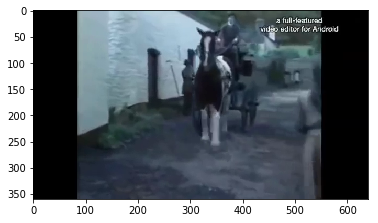

In [39]:
plt.imshow(frame)

## Task 3: Fixing color convention

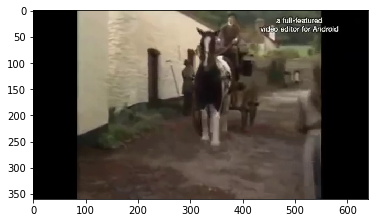

In [40]:
fix_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(fix_frame)

## Task 3: Cropping a video frame

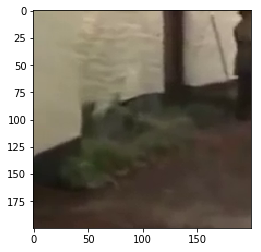

In [43]:
plt.imshow(fix_frame[100:300, 100:300])

## Task 3: Adjusting Brightness

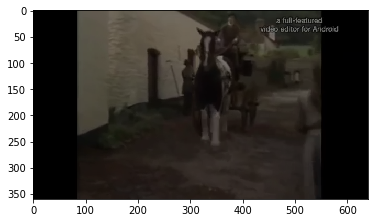

In [51]:
darker = 0.5 * fix_frame
darker = darker.astype(np.uint8)
plt.imshow(darker)

## Task 5: Generating a new video file

## Task 5: Finding the total frame count

In [57]:
video = cv2.VideoCapture(VFILE)
count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
video.release()
count

138695

## Task 6: Creating a collage

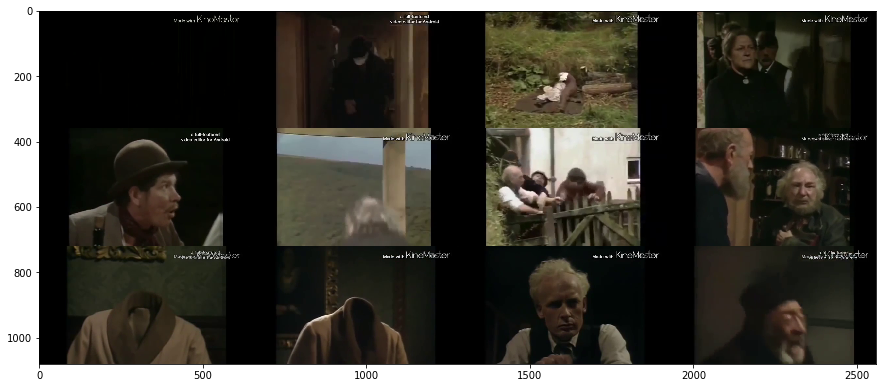

In [74]:
skip_count = 10000
frames = []
counter = 0
for f in get_frames(VFILE):
    if f  is None:
        break
    if counter % skip_count == 0:
        frames.append(f)
    counter+=1
row1 = np.concatenate(frames[0:4], axis = 1)
row2 = np.concatenate(frames[4:8], axis = 1)
row3 = np.concatenate(frames[8:12], axis = 1)
collage = np.concatenate((row1, row2, row3), axis = 0)
collage = cv2.cvtColor(collage, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (15,15))
plt.imshow(collage)